# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in data science and machine learning. It transforms high-dimensional data into a lower-dimensional form while retaining as much variance (information) as possible. PCA is particularly helpful for visualization, noise reduction, and as a preprocessing step for machine learning models.

## Key Concepts

1. **Variance**: Variance measures the spread of data points around the mean. In PCA, we aim to maximize the variance captured in each principal component, as components with higher variance hold more information.

2. **Covariance Matrix**: This matrix represents how pairs of features vary together. A high positive covariance between two features suggests they increase or decrease together, while a negative covariance suggests an inverse relationship. PCA leverages the covariance matrix to understand relationships between features.

3. **Eigenvalues and Eigenvectors**: Eigenvalues represent the magnitude of variance along each principal component, while eigenvectors represent the directions of these components. The eigenvectors corresponding to the largest eigenvalues are chosen as the principal components, as they capture the most variance in the data.

4. **Principal Components**: These are new axes (linear combinations of original features) onto which data is projected. Each principal component is orthogonal to the others, ensuring they capture unique aspects of the data’s variance.

## Steps in PCA

1. **Standardize the Data**:
   - Since PCA is affected by the scale of the data, standardization is necessary to ensure all features contribute equally. We typically use a technique like z-score normalization to make the mean of each feature zero and the variance one.

2. **Compute the Covariance Matrix**:
   - Calculate the covariance matrix of the standardized data. This matrix will help us understand how features vary with respect to one another.

3. **Calculate Eigenvalues and Eigenvectors**:
   - Find the eigenvalues and eigenvectors of the covariance matrix. Eigenvalues indicate the amount of variance explained by each eigenvector (direction). Larger eigenvalues mean the component captures more variance.

4. **Sort Eigenvalues and Select Principal Components**:
   - Sort the eigenvalues in descending order, and choose the top *k* eigenvalues and their corresponding eigenvectors. These *k* eigenvectors become our principal components, capturing the most significant patterns in the data.

5. **Transform the Data**:
   - Project the original data onto the selected principal components, producing a new dataset with reduced dimensions. This new dataset retains the most important information from the original data in fewer dimensions.

## Example Workflow in PCA

Consider a dataset with four features (4D data). Applying PCA might reduce it to two dimensions (2D) while capturing, for instance, 95% of the original variance. By plotting the data in this reduced 2D space, we can visualize the inherent patterns and clusters more easily, without losing much information.

### Summary
PCA allows us to:
- Reduce dimensionality while preserving significant patterns.
- Visualize complex, high-dimensional data in 2D or 3D.
- Remove noise and redundant features, simplifying the data for further analysis.

PCA is a powerful tool when dealing with high-dimensional datasets, where it aids in both data exploration and feature extraction for machine learning.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Set up Seaborn for better visuals
sns.set(style="whitegrid")


In [2]:
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# Convert to a DataFrame for better readability
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

# Display the first few rows of the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Pair Plot Visualization

The pair plot can reveal correlations between features. If we see a strong linear pattern between two features, it suggests they are correlated, which may impact how PCA interprets the data. Highly correlated features might be redundant for the purposes of dimensionality reduction, making PCA a good candidate for simplifying the dataset.

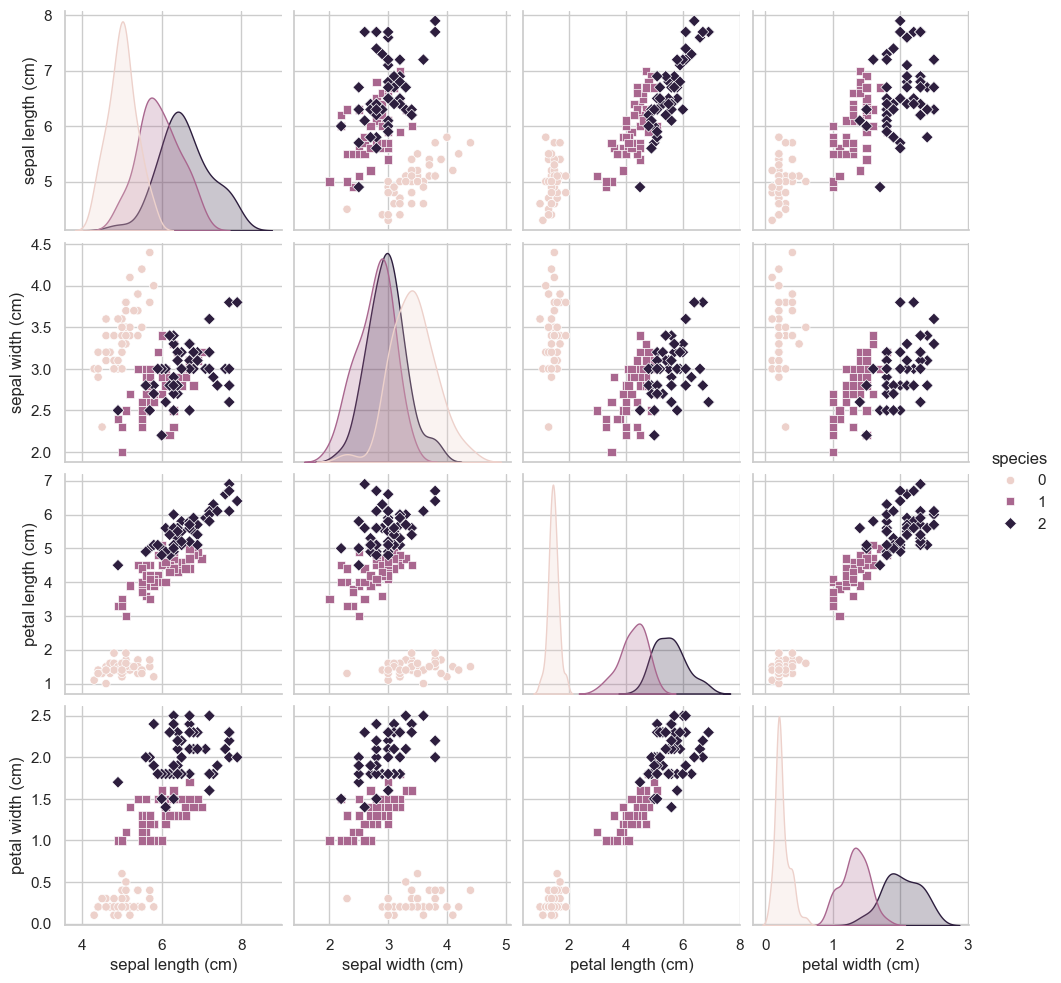

In [3]:
# Pair plot to see relationships between features
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.show()


## Standardization of the Data

Before applying Principal Component Analysis (PCA), it’s essential to **standardize** the data. Standardization ensures that each feature contributes equally to the analysis by transforming them to a common scale. Here’s why it’s necessary and how it works:

### Why Standardize?

1. **Equal Contribution of Features**:
   - PCA aims to maximize variance along new principal components, so features with larger scales would dominate the analysis if we didn’t standardize.
   - For instance, in the Iris dataset, if one feature had values ranging from 0 to 100 and another ranged from 0 to 1, the larger-scaled feature would disproportionately impact the resulting principal components, regardless of its actual importance.

2. **Ensuring Meaningful Comparisons**:
   - Standardization makes the data dimensionless, meaning each feature has the same unit scale, which is essential for fair comparisons between them.
   - This allows PCA to identify patterns and directions of maximum variance that are representative of the entire dataset, rather than being skewed by varying feature scales.


In [4]:
# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Check the standardized data
pd.DataFrame(X_std, columns=feature_names).head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### What is Covariance?

Covariance is a measure of the degree to which two features change together:
- If two features increase or decrease together, they have a **positive covariance**.
- If one feature increases while the other decreases, they have a **negative covariance**.
- If two features are independent, their covariance will be close to zero.

### Why the Covariance Matrix is Important in PCA

1. **Identifying Relationships Between Features**:
   - The covariance matrix reveals relationships and dependencies between features. For instance, if two features have a high positive or negative covariance, it indicates they are linearly related, and one may be redundant.
   
2. **Finding Principal Components**:
   - PCA finds the **eigenvectors** and **eigenvalues** of the covariance matrix. The eigenvectors (principal components) define directions of maximum variance, and the eigenvalues indicate the magnitude of variance in those directions.
   - PCA then selects the top eigenvectors (with the highest eigenvalues) as the principal components, capturing the directions with the most significant information in the data.

In [5]:
# Compute the covariance matrix
cov_matrix = np.cov(X_std.T)
print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


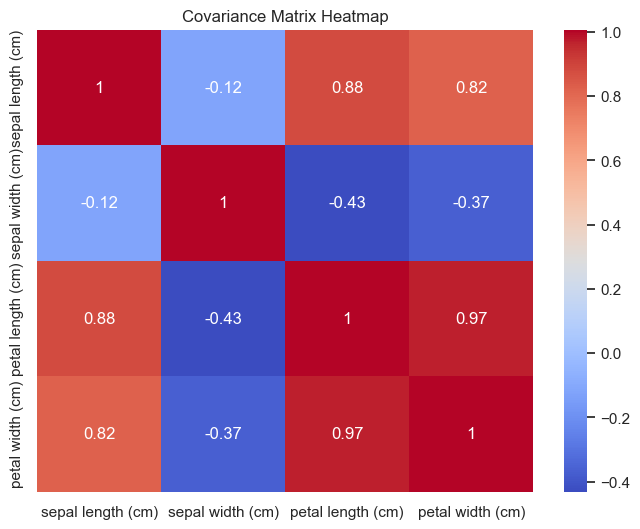

In [6]:
# Create a heatmap to visualize the covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", xticklabels=data.feature_names, yticklabels=data.feature_names)
plt.title("Covariance Matrix Heatmap")
plt.show()

In [7]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


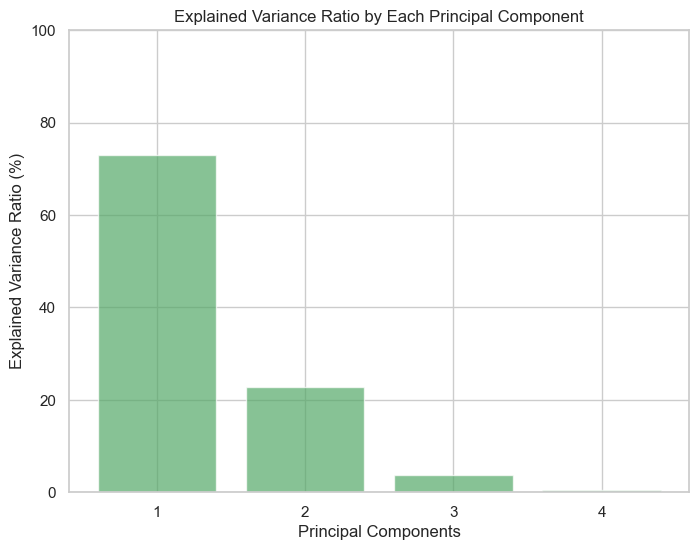

In [8]:
# Normalize eigenvalues to get explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Create a bar plot to visualize the explained variance ratio (percentage)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, alpha=0.7, color='g')
plt.title('Explained Variance Ratio by Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio (%)')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.ylim(0, 100)  # Set Y-axis from 0% to 100%
plt.show()

## Applying PCA

In this step, we perform Principal Component Analysis (PCA) on the standardized data to reduce the dimensionality and project the data onto the new principal component axes. PCA transforms the data into a new coordinate system based on the eigenvectors (principal components) derived from the covariance matrix.

### Key Concepts:

- **Principal Components**: The directions in the data space that capture the maximum variance. These are the eigenvectors of the covariance matrix.
- **Explained Variance**: The amount of variance captured by each principal component, determined by the corresponding eigenvalue.
- **Dimensionality Reduction**: By selecting a subset of the principal components, we can reduce the number of dimensions (features) while preserving most of the variance in the data.



In [9]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Show the explained variance ratio
print("Explained Variance Ratios:", pca.explained_variance_ratio_)


Explained Variance Ratios: [0.72962445 0.22850762]


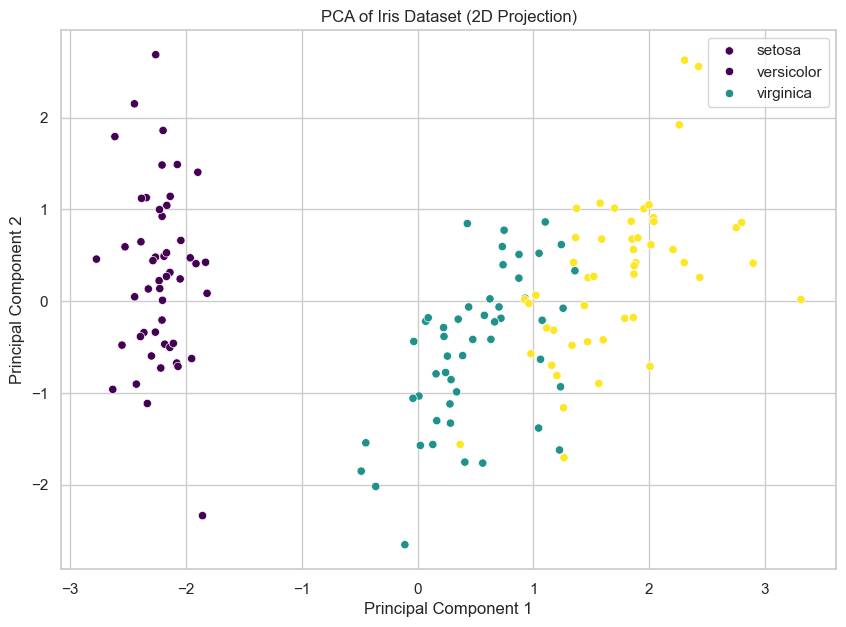

In [10]:
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

# Plot the 2D projection
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='species', palette="viridis", data=pca_df, legend='full')
plt.title("PCA of Iris Dataset (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(data.target_names)
plt.show()


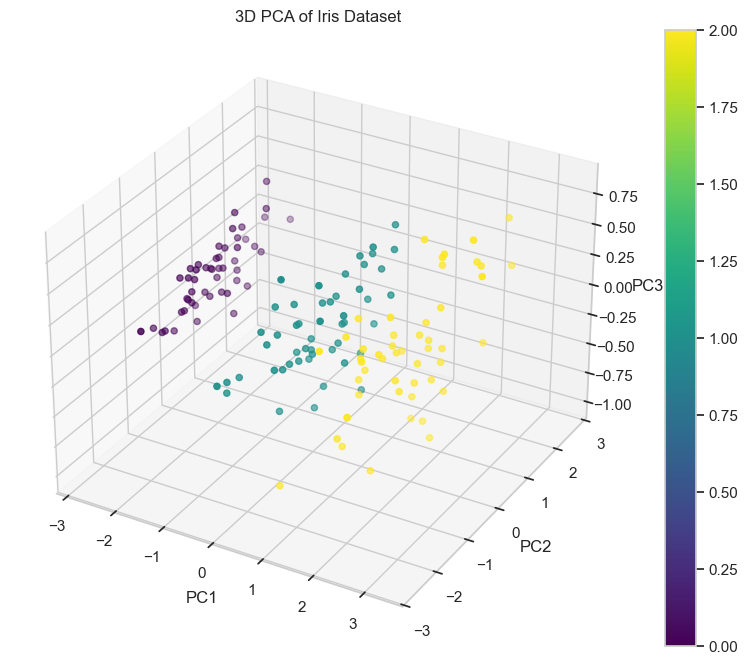

In [11]:
# Apply PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_std)

# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("3D PCA of Iris Dataset")
plt.colorbar(scatter)
plt.show()


In [12]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
